# **Introduction**

This section provides a basic introduction to the Kaggle programming environment. If you are already framiliar with Kaggle, you can skip to **Chateau Winery (A): Unsupervised Learning**.

## **Jupyter Notebooks & Kaggle**

The document you are currently reading is called a **Jupyter notebook**. Jupyter notebooks are just one of many different ways to write, run, and present Python code. This is a particularly good option in business settings, as Jupyter notebooks allow you to combine your code with well-formated images and text. As you will see, we can use this functionality to create presentation-ready reports that combine our code and its outputs with a written discussion of our results. Like any other type of document, Jupyter notebooks can be created and run on a variety of platforms; for this course, we will run our notebooks on Kaggle. 

**Kaggle** is a machine learning and data science platform that hosts online competitions where users compete to build the best predictive models. Kaggle also allows you to create, edit, and run Jupyter notebooks in your browser. For this course we will be running all of our code in Jupyter notebooks on Kaggle.

## Copy This Notebook

The first thing you need to do is create a copy of this notebook. To do this, simply click "Copy and Edit" at the top right:

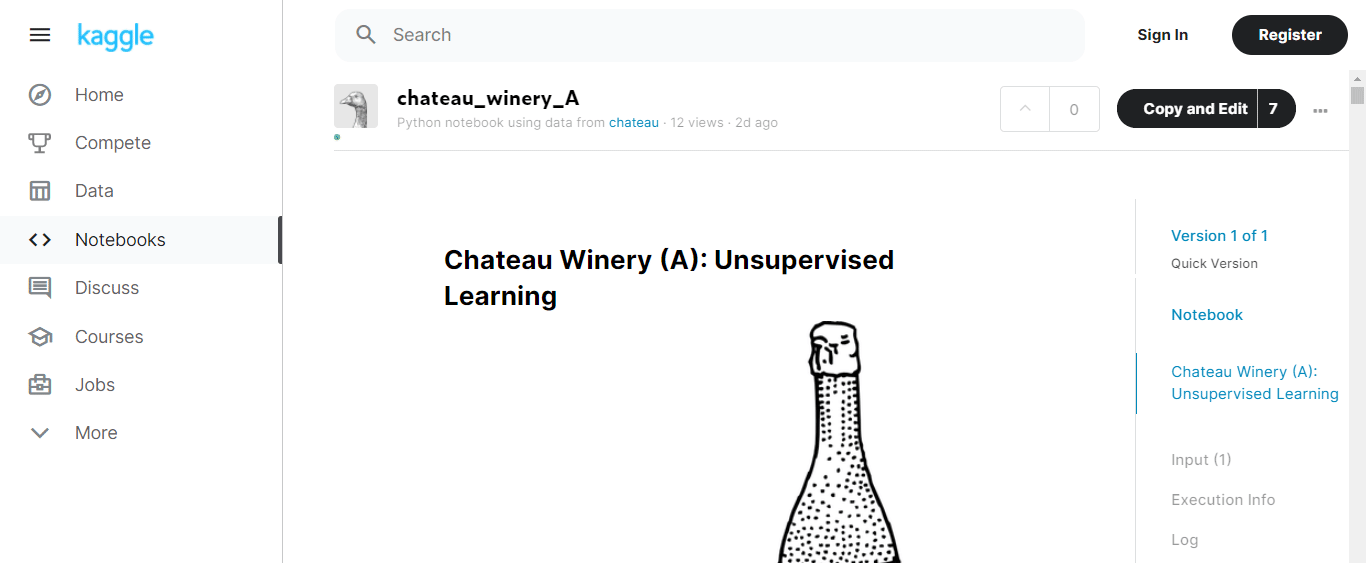

### Start Programming

So far everything we've seen in this notebook has been a **text cell**. However, the real power of Jupyter is that notebooks consist of both text cells and **code cells**. 

To add a code cell, all we need to do is click the "+ Code" button at the top or bottom of any existing cell. Once we've added our code cell, we can write Python code inside the cell and then run it by pressing the "Play" button on the left-hand side. When the cell has finished running, the output will be displayed directly below the cell. 

Additionally, a set of brackets with a number in it will appear to the left of the code cell after it has finished running. This is used to track the order in which you have run the code cells in your notebook. If the brackets contain an astersik ("[\*]"), this indicates the cell is currently running. 

Following the steps shown in the animated gif below, add a code cell and try writing some basic Python code!

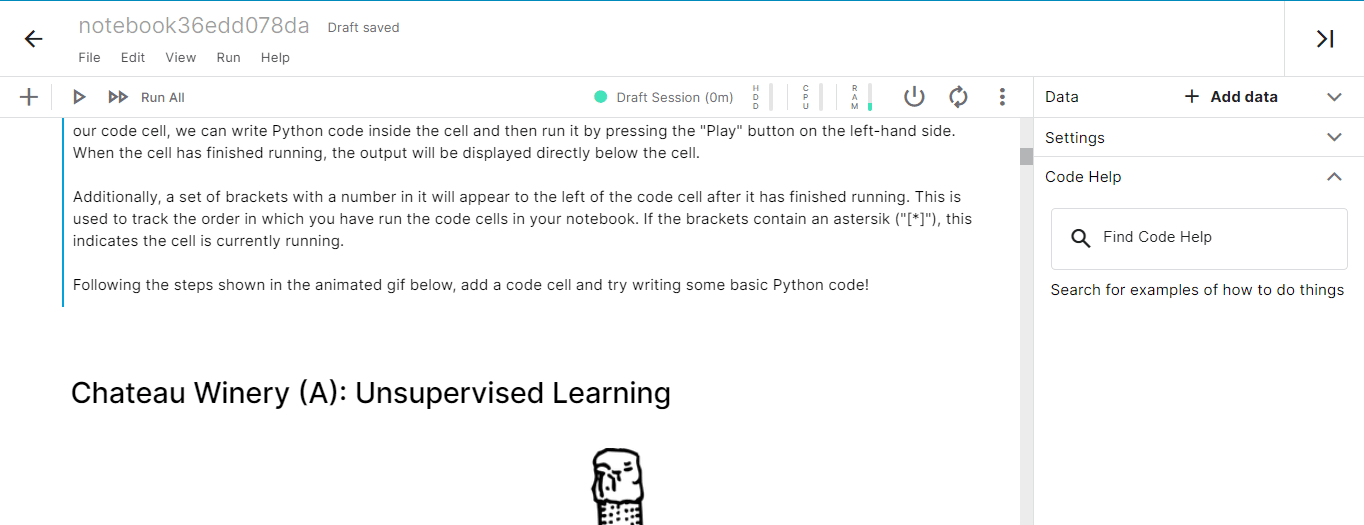

# **Chateau Winery (A): Unsupervised Learning**

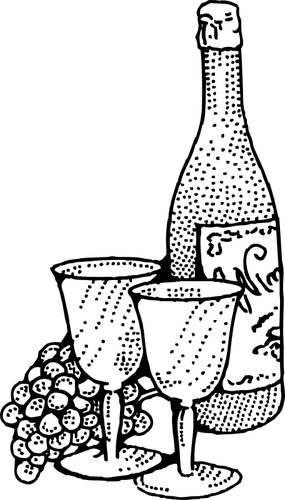

This case follows Bill Booth, the marketing manager for Chateau winery, as he attempts to construct targeted deals for specific groups of customers using historical online sales data. 

This supplemental notebook demonstrates how some of the analyses in the case can be conducted in the Python programming language. The notebook does *not* assume prior experience with Python or programming in general. However, it is also not an introduction to Python (or programming). Therefore, if you have little programming experience, much of the code may look mysterious or even intimidating. We encourage the reader to focus on the *logic* of the code and its overall structure, as opposed to the specific syntax.    

---

## **Load Packages**

The Python programming language on its own includes a large toolbox of pre-written commands that you can use to analyze your data. However, you can add to this toolbox by installing additional **modules** and **packages**. These contain code already written by the Python community that you can import and use for your particular analysis. Most Python modules and packages are open-source and free to use.

For example, the k-means clustering algorithm is not natively built into the Python language. We could write the code for the algorithm ourselves, but someone has already done this and published it as part of the $\texttt{sklearn}$ package. All we need to do is import that package, and we can then apply the pre-written algorithm to our data.   

The code cell below loads all the packages we will need for the analyses in this notebook. Note that you only need to run this code cell once per session. As shown in the **Introduction** section, all you need to do is press the "Play" button to the left of the cell. Because we are just loading packages there is nothing to print, so nothing will appear below the cell when it is finished running. 

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.em import EMClusterer
from nltk.cluster.util import cosine_distance
import matplotlib.pyplot as plt
from sklearn import preprocessing

## **Read in Data**

To perform the cluster analysis from the case, we first need to read in the customer data with everyone's purchases of Pinot Noir and Champage (from **Exhibit 1**). This data is saved in a comma-separated value (csv) file named "wine_data.csv", which comes pre-loaded in this project. The code cell below does the following:

1. We can use the $\texttt{read}$_$\texttt{csv}()$ function that we imported from the $\texttt{pandas}$ package (abbreviated $\texttt{pd}$) to read in the data. We use an equals sign ($\texttt{=}$) to store this data into a Python object called $\texttt{wine}$_$\texttt{data}$. 

2. We can view the first few rows of our data set with the $\texttt{head()}$ method. 

In [ ]:
# Step 1: Read data into wine_data
wine_data = pd.read_csv("../input/chateau/wine_data.csv")

# Step 2: Display first five rows of data
wine_data.head()

### Size of data

We can determine the dimensions of the data as follows:


In [ ]:
wine_data.shape

This indicates that our data contains 63 rows (one for each customer) and three columns (the name of the customer, their purchases of Pinot Noir, and their purchases of Champage).

## **K-Means Clustering**

Now that we've read our data into Python, we can start clustering! We will begin by applying the k-means clustering algorithm. 

---

### Step 1: Visualize data

Before we start clustering, let's begin by creating a scatterplot of our data. We can use the $\texttt{scatter}$() function from the $\texttt{matplotlib.pyplot}$ package to visualize our feature space (*see* case **Exhibit 2A**):

In [ ]:
# Create scatter plot with Pinot Noir on the x-axis and Champage on the y-axis
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'])

# Add a title to the plot
plt.title("Exhibit 2A: The Data")

# Add labels for the x and y axes
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

### Step 2: Apply k-means clustering with $k$=2

Next we can easily apply the k-means algorithm in Python using tools from the $\texttt{sklearn.cluster}$ module we imported at the beginning of the notebook. 

#### Step 2a: Initialize clustering

First we need to create a $\texttt{KMeans}$ object (which we'll call $\texttt{kmeans2}$) and specify our desired value for the number of clusters ($k$). We do this using $\texttt{KMeans}$(), which takes the following arguments:
+ $\texttt{n}$\_$\texttt{clusters}$, our desired value for $k$.
+ $\texttt{init}$, an optional parameter with the starting points for the cluster centroids. If this parameter is left out, the initial centroids will be chosen automatically. See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) for more details. 
+ $\texttt{n}$\_$\texttt{init}$, an optional parameter that specifies the number of times the algorithm is run with different starting points. Because we are only running with the initial cluster centroids specified on page 3 of the case, we set this parameter to one.

**Note** that in the code cell below we are not printing anything out to screen, we're just creating the $\texttt{kmeans2}$ object. This means that nothing will appear below the cell after it is finished running (you will know it's finished running when a number appears in the brackets to the left of the cell). 

In [ ]:
kmeans2 = KMeans(n_clusters=2, init=np.array([[8, 17],[27, 1]]), n_init=1)

#### Step 2b: Prepare input data

There are many different ways to store data in Python, and the *best* way for each data set depends on many different factors that we will not explore here. However, because of the way the function is written, the $\texttt{kmeans()}$ function in the next step requires our data to be stored as something called a **numpy array**. This is simply one of many different ways to represent data in Python. 

In this step, we convert our data to a numpy array with the $\texttt{to}$_$\texttt{numpy()}$ method. Again, we are not altering the contents of the data in any way, just storing it in a different format. In the code cell below we create the array, store it in $\texttt{X}$_$\texttt{wine}$, and output the first five elements; note that these correspond to the first five rows of the data from the **Read in Data** section above. 

In [ ]:
X_wine = wine_data[['Pinot Noir', 'Champagne']].to_numpy()
X_wine[:5]

#### Step 2c: Perform k-means clustering

Now we apply the k-means clustering algorithm to our data by calling the $\texttt{fit}$() method on the $\texttt{kmeans2}$ object we created in Step 2a. We pass the numpy array with our data ($\texttt{X}$\_$\texttt{wine}$) into $\texttt{fit}$().

In [ ]:
kmeans2.fit(X_wine)

#### Step 2d: View output

We can output the coordinates of the final cluster centroids with $\texttt{kmeans2.cluster}$\_$\texttt{centers}$\_:

In [ ]:
kmeans2.cluster_centers_

We can also visualize our clusters using $\texttt{plt.scatter}$(). The points in the plot below are color-coded according to their assigned cluster, and **X** is used to mark each cluster centroid.

In [ ]:
# Plot chart title and label the x and y axes
plt.title("Exhibit 2D: Final Centroid Locations")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=kmeans2.labels_, cmap='bwr')

# Plot the final cluster centroids in black
plt.scatter(kmeans2.cluster_centers_[:,0] ,kmeans2.cluster_centers_[:,1], marker="X", 
            color='black', s=200)

### Step 3: Apply k-means clustering with $k$=3

Following the same steps as above, we can run the k-means clustering algorithm with $k$=3. 

#### Step 3a: Initialize clustering

Now we create a $\texttt{KMeans}$ object called $\texttt{kmeans3}$ where we set $\texttt{n}$\_$\texttt{clusters}$ equal to three. This time we will leave out the optional $\texttt{init}$ and $\texttt{n}$\_$\texttt{init}$ parameters. By leaving these parameters out the function will try several different random starting points for the cluster centroids and choose the points with the best performance.

Note that we include the optional $\texttt{random}$\_$\texttt{state}$ parameter, which sets the **seed** of the random number generator (RNG). By seeding the RNG we ensure that the same random starting points are chosen each time we perform the clustering, which ensures that our results do not change every time we re-run the code cell. The value of the seed (162012) was itself chosen randomly. 

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=162012)

#### Step 3b: Prepare input data

Our input data is the same even though we are changing the number of clusters, so we do not need to do anything here. We already took care of this in Step 2b.

#### Step 3c: Perform k-means clustering

Now we apply $\texttt{fit}$() to $\texttt{kmeans3}$:

In [ ]:
kmeans3.fit(X_wine)

#### Step 3d: View output

As before, we can output the cluster centroids:

In [ ]:
kmeans3.cluster_centers_

And we can visualize the clusters:

In [ ]:
# Plot chart title and label the x and y axes
plt.title("Exhibit 3B: Optimized clusters, k=3")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=kmeans3.labels_, cmap='brg')

# Plot the final cluster centroids in black
plt.scatter(kmeans3.cluster_centers_[:,0] ,kmeans3.cluster_centers_[:,1], marker="X", 
            color='black', s=200)

### Step 4: Apply k-means clustering with your own $k$

The cell below combines all of the code from steps 2/3 into one cell. All you need to do is set $\texttt{k}$ equal to your desired number of clusters, then run the cell. 

In [ ]:
k = 2 # <-- replace "2" with your desired number of clusters

####### Step 4a: Initialize clustering #########################################
kmeansK = KMeans(n_clusters=k, random_state=162012)


####### Step 4b: Prepare input data ############################################
# Nothing to do here, as X_wine was already created earlier


####### Step 4c: Perform k-means clustering ####################################
kmeansK.fit(X_wine)


####### Step 4d: View output ###################################################
# Plot chart title and label the x and y axes
plt.title("Optimized clusters, k="+str(k))
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=kmeansK.labels_, cmap='brg')

# Plot the final cluster centroids in black
plt.scatter(kmeansK.cluster_centers_[:,0] ,kmeansK.cluster_centers_[:,1], marker="X", 
            color='black', s=200)

## **Silhouette Values**

As a reminder, the **silhouette value** is an indication of how well a data point fits in its cluster (*see* case **Exhibit 4a**). A silhouette value close to zero indicates that the data point could reasonably belong to its assigned cluster or the next closest cluster. A silhouette value close to 1 indicates that the data point clearly belongs to its assigned cluster. 

### Step 1: Calculate silhouette score for $k$=2

First we will calculate the average silhouette values for all of the observations when $k$=2. We can do this using the $\texttt{silhouette}$_$\texttt{score}$() function that we imported from $\texttt{sklearn.metrics}$. This function takes two arguments:
+ $\texttt{X}$\_$\texttt{wine}$, the numpy array we created with each observation in our data set.
+ $\texttt{labels}$, an array containing the cluster assignments for each of the observations in $\texttt{X}$\_$\texttt{wine}$. We can create this array with $\texttt{fit}$\_$\texttt{predict}$().

In [ ]:
labels2 = kmeans2.fit_predict(X_wine)
silhouette_score(X_wine, labels2)

If we print out the cluster assignments contained in $\texttt{labels2}$, we'll see that there are two clusters - cluster 0 and cluster 1. Because Python uses a [zero-based numbering system](https://en.wikipedia.org/wiki/Zero-based_numbering), sequences always start with zero instead of one. 

In [ ]:
labels2

Now we create a new column called $\texttt{Cluster}$ ($\texttt{k=2}$) with the cluster assignment for each customer in our data set. Note that we add one to $\texttt{labels2}$ so that there is no cluster zero.

In [ ]:
wine_data["Cluster (k=2)"] = labels2 + 1
wine_data.head()

### Step 2: Calculate silhouette score for $k$=3

We can apply this same process to calculate the average silhouette values for all of the observations when $k$=3:

In [ ]:
labels3 = kmeans3.fit_predict(X_wine)
silhouette_score(X_wine, labels3)

We can also add the $k$=3 cluster assignments to $\texttt{wine}$\_$\texttt{data}$.

In [ ]:
wine_data["Cluster (k=3)"] = labels3 + 1
wine_data.head()

### Step 3: Calculate silhouette value for each observation

While $\texttt{silhouette}$\_$\texttt{score}$() returns the *average* silhouette value for all of the observations in the sample, we can use the $\texttt{silhouette}$\_$\texttt{sample}$() function from $\texttt{sklearn.metrics}$ to get the silhouette value for each individual observation. In the code cell below, we create a new column in $\texttt{wine}$\_$\texttt{data}$ with the silhouette value for each observation when $k$ = 2. This corresponds to **Exhibit 4b**. 

In [ ]:
wine_data["Silhouette Value (k=2)"] = silhouette_samples(X_wine, labels2)
wine_data.head()

Of course, the average of this column is equal to the silhouette score we calculated in Step 1. 

In [ ]:
wine_data["Silhouette Value (k=2)"].mean()

Using the same code, we can create a similar column in $\texttt{wine}$\_$\texttt{data}$ with the silhouette value for each observation when $k$ = 3:

In [ ]:
wine_data["Silhouette Value (k=3)"] = silhouette_samples(X_wine, labels3)
wine_data.head()

Now we can output the silhouette values for every customer to see how they differ when $k$=2 v. $k$=3. The $\texttt{sort}$\_$\texttt{values}$() method allows us to conduct a multi-level sort over more than one column.

In [ ]:
wine_data.sort_values(by=["Cluster (k=2)", "Cluster (k=3)", "Silhouette Value (k=2)"],
                         ascending=[True, True, False])

### Step 4: Plot silhouette score for different $k$s

Using a **for loop**, we can loop over many different values of $k$ and apply the k-means clustering algorithm. For each value of $k$ we can then calculate the average silhouette value and create a plot that shows the optimal number of clusters based on the silhouette score. 

**Note:** Don't worry if this code chunk is intimidating! The specifics of the syntax are less important, just try following the general logic of the code. 

In [ ]:
silhouette_scores = [] # Initialize empty list to store silhouette scores

# Loop over different values of k and calculate the average silhouette score
for i in range(2, 50):
    
    # Initialize clustering with k = i
    kmeansI = KMeans(n_clusters=i, random_state=817910)
    
    # Apply clustering
    kmeansI.fit(X_wine)
    
    # Calculate the silhouette score when k = i
    labelsI = kmeansI.fit_predict(X_wine)
    scoreI = silhouette_score(X_wine, labelsI)
    
    # Add silhouette score at k = i to silhouette_scores
    silhouette_scores.append((i, scoreI))
    
# Plot the average silhouette score for each value of k
x,y = zip(*silhouette_scores)
plt.plot(x, y)

# Plot a vertical line at whichever k maximizes the silhouette score
maxK = x[y.index(max(y))]
plt.axvline(x=maxK, color="black")
plt.text(18, 0.4, 'k='+str(maxK), color='black')

# Label the chart and the x and y axes
plt.title("Silhouette Plot")
plt.xlabel("Number of Clusters (k)")
plt.xlim([2,50])
plt.ylabel("Average Silhouette Score")

## **Gaussian Mixture Models**

As a reminder, Gaussian Mixture Models (GMM) assume that clusters are distributed as a normal distribution with different means and some variance-covariance structure. The GMM estimates the parameters of these distributions to maximize the probability that the data were drawn from these distributions. 

### Step 1: Apply GMM with $k$=2

Now that we've seen how to apply the k-means algorithm to our data, let's apply GMM. 

#### Step 1a: Initialize clustering

Similar to the k-means algorithm, we start by creating a $\texttt{GaussianMixture}$ object where we specify our desired value for $k$. This time we specify the number of clusters with the $\texttt{n}$\_$\texttt{components}$ parameter. 


In [ ]:
gmm2 = GaussianMixture(n_components=2, n_init=1, random_state=994561)

#### Step 1b: Perform GMM clustering

As we did with k-means clustering, we perform GMM clustering by applying $\texttt{fit}$() to $\texttt{gmm2}$ and passing in the data stored in the numpy array $\texttt{X_wine}$:

In [ ]:
gmm2.fit(X_wine)

#### Step 1c: View output

Similar to before, we can plot the clusters by color:

In [ ]:
# Plot chart title and label the x and y axes
plt.title("Gaussian Mixture Model, k=2")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
labels = gmm2.predict(X_wine)
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=labels, cmap='cool')

We can also output the probability that a given observation belongs to each cluster. In the code chunk below, we output this information for the first five observations. The first column represents the probability that each observation belongs to cluster 1, and the second column represents the probability that each observation belongs to cluster 2. For example, according to the model the probability that the first observation belongs to the first cluster is 0.317, and the probability that it belongs to the second cluster is 0.683.

In [ ]:
probAssignments = gmm2.predict_proba(X_wine)
probAssignments[:5].round(3)

Using these probabilities, we can scale the color of each point in our plot based on the confidence of the assignment. In the plot below, observations that have a high probability of belonging to one cluster are either bright blue or bright pink. The points in between these two color extremes are observations whose probability assignments are more evenly distributed over the two clusters. 

In [ ]:
labelsProb = [i[0] for i in probAssignments]
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=labelsProb, cmap='cool')

### Step 2: Apply GMM with $k$=3

Using the same code as Step 1, below we apply GMM with three clusters. 

In [ ]:
# Perform clustering
gmm3 = GaussianMixture(n_components=3, n_init=1, random_state=605973)
gmm3.fit(X_wine)

# Plot chart title and label the x and y axes
plt.title("Exhibit 5B: Gaussian Mixture Model, k=3")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
labels = gmm3.predict(X_wine)
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=labels, cmap='brg')

## **Clustering with Cosine Similarity**

Instead of applying the k-means clustering algorithm with Euclidean distance, we can also apply it in Python with cosine similarity. 

### Step 1: Apply k-means clustering with $k$=2 using cosine similarity

#### Step 1a: Initialize clustering

Because $\texttt{KMeans}$ from $\texttt{sklearn.cluster}$ does not support cosine similarity, we will now use an alternate implementation of the algorithm from $\texttt{nltk.cluster.kmeans}$. We start by initializing a $\texttt{KMeansClusterer}$ object where $k$=2. We also set the $\texttt{distance}$ parameter equal to $\texttt{cosine}$\_$\texttt{distance}$ to indicate we would like to use cosine similarity as our distance measure. 

In [ ]:
kmeans2Cos = KMeansClusterer(2, distance=cosine_distance, avoid_empty_clusters=True, repeats=500)

#### Step 1b: Perform k-means clustering

Because we are now using a different implementation of the k-means clustering algorithm, the way in which we apply the model is slightly different. Below we apply $\texttt{cluster}$() to our $\texttt{kmeans2Cos}$ object and pass in the numpy array with our data ($\texttt{X_wine}$). Note also that we set $\texttt{assign}$\_$\texttt{clusters=True}$.

In [ ]:
kmeans2CosClusters = kmeans2Cos.cluster(X_wine, assign_clusters=True)

#### Step 1c: View output

We can view the clusters created with cosine similarity as before:

In [ ]:
# Plot chart title and label the x and y axes
plt.title("Exhibit 6B: Final Centroid Positions, k=2")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=kmeans2CosClusters, cmap='bwr')

### Step 2: Apply k-means clustering with $k$=3 using cosine similarity

Using the same code as Step 1, below we apply k-means clustering using cosine similarity with three clusters. 

In [ ]:
# Perform clustering
kmeans3Cos = KMeansClusterer(3, distance=cosine_distance, avoid_empty_clusters=True, repeats=500)
kmeans3CosClusters = kmeans3Cos.cluster(X_wine, assign_clusters=True)

# Plot chart title and label the x and y axes
plt.title("Exhibit 7A: K-means Cluster Assignments")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=kmeans3CosClusters, cmap='brg')

### Step 3: Apply GMM clustering with $k$=3 using cosine similarity

Because the $\texttt{GaussianMixture}$() function does not support cosine similarity, we need to use a workaround. Minimizing the Euclidean distance between $x$ and $y$ is equivalent to maximizing their cosine similarity *if the data are normalized*. Therefore, if we normalize our data first, clustering with Euclidean distance is equivalent to clustering with cosine similarity. 

#### Step 3a: Normalize vectors

First we use the $\texttt{normalize}$() function from $\texttt{sklearn}$ to normalize our data.

In [ ]:
wine_data_norm = preprocessing.normalize(wine_data[['Pinot Noir', 'Champagne']])
wine_data_norm[:5]

#### Step 3b: Perform GMM clustering

Now we apply the $\texttt{GaussianMixture}$() function to our normalized data. 

In [ ]:
# Perform clustering
gmm3cos = GaussianMixture(n_components=3, random_state=144038)
gmm3cos.fit(wine_data_norm)

# Plot chart title and label the x and y axes
plt.title("Exhibit 5B: Gaussian Mixture Model, k=3")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
labels = gmm3cos.predict(wine_data_norm)
plt.scatter(wine_data['Pinot Noir'], wine_data['Champagne'], c=labels, cmap='brg')